In [1]:
# Step 1: Upload dataset
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


  Decision Tree Accuracy: 0.8

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

 Random Forest Accuracy: 0.9853658536585366

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



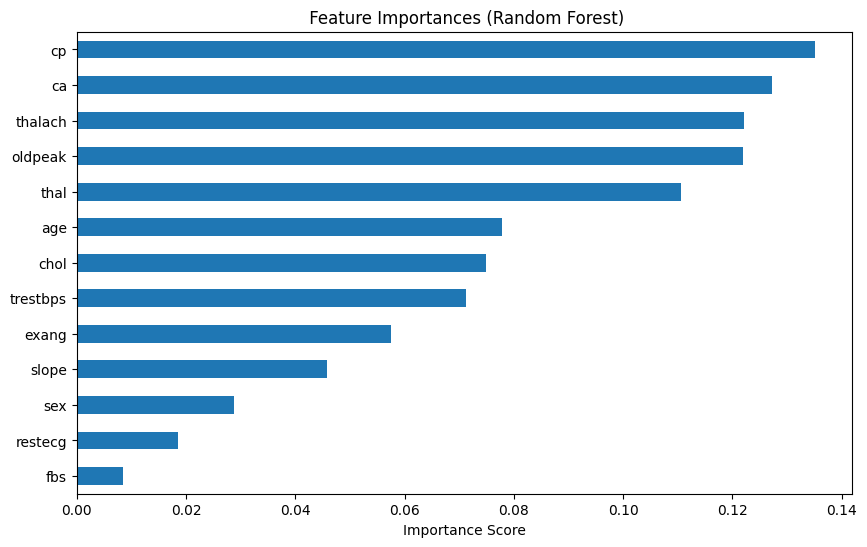

 Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
 Average Accuracy: 0.9970731707317073


In [2]:
#  Step 2: Load dataset using Pandas
import pandas as pd
import io

# Replace 'heart.csv' with the exact file name you uploaded
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
df.head()

#  Step 3: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import graphviz

#  Step 4: Data preprocessing
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Step 5: Train a Decision Tree Classifier
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)

y_pred_dt = dtree.predict(X_test)

print("  Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

#  Step 6: Visualize Decision Tree
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dtree, out_file=None,
                           feature_names=X.columns,
                           class_names=['No Disease', 'Disease'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Save to PDF
graph  # Show tree inline in notebook

#  Step 7: Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(" Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

#  Step 8: Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title(" Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

#  Step 9: Cross-Validation on Random Forest
cv_scores = cross_val_score(rf, X, y, cv=5)

print(" Cross-Validation Scores:", cv_scores)
print(" Average Accuracy:", np.mean(cv_scores))
